<a href="https://colab.research.google.com/github/anushree124/PRODIGY_TrackCode_TaskNumber/blob/main/PRODIGY_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading cat images...


100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


Loading dog images...


100%|██████████| 20/20 [00:03<00:00,  5.19it/s]


Training SVM model...
Making predictions...
Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

         Cat       0.67      0.40      0.50         5
         Dog       0.40      0.67      0.50         3

    accuracy                           0.50         8
   macro avg       0.53      0.53      0.50         8
weighted avg       0.57      0.50      0.50         8



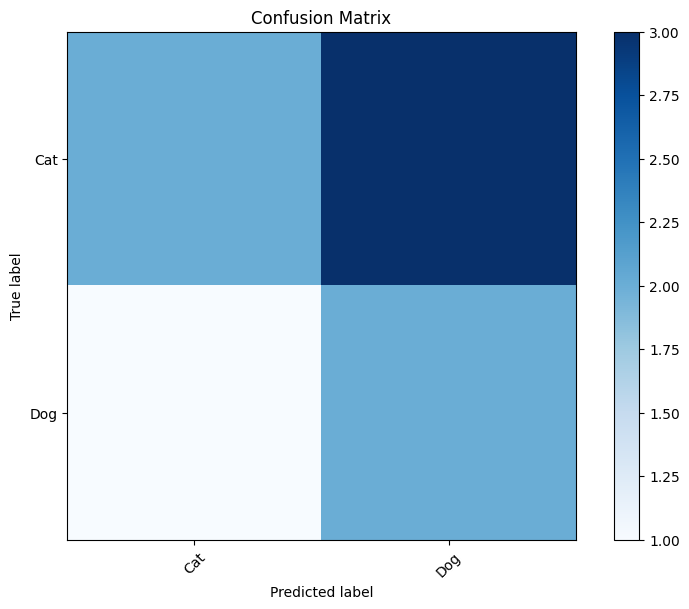

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from tqdm import tqdm

# Function to load and preprocess images
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((64, 64))  # Resize for consistency
            img_array = np.array(img).flatten()  # Flatten the 2D array
            images.append(img_array)
            labels.append(label)
    return images, labels

# Load the dataset
cat_folder = '/content/drive/MyDrive/dogs vs cats/train'
dog_folder = '/content/drive/MyDrive/dogs vs cats/test1'

print("Loading cat images...")
cat_images, cat_labels = load_images(cat_folder, 0)
print("Loading dog images...")
dog_images, dog_labels = load_images(dog_folder, 1)

# Combine datasets
X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
print("Training SVM model...")
clf = svm.SVC(kernel='rbf', C=1.0, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
print("Making predictions...")
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Cat', 'Dog'], rotation=45)
plt.yticks(tick_marks, ['Cat', 'Dog'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()